# My friends image classification 

# Importing all the necessary depencies 

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


# (1) Preprocessing: Detect face and eyes of images 
When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.
**Now how do you detect face and eyes?**
We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar


In [13]:
# Read the image "hussein2.jpeg" from the specified path
img = cv2.imread(r'C:/Users/HP/Downloads/friends_svm/model/test_images/hussein2.jpeg')

# Retrieve the shape of the image (height, width, number of channels)
img_shape = img.shape

(1024, 818, 3)

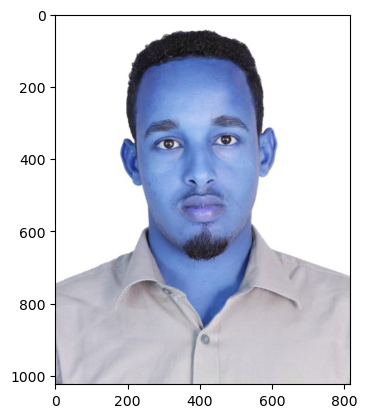

In [14]:
# Display the image
plt.imshow(img)

In [15]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Retrieve the shape of the grayscale image (height, width)
gray_shape = gray.shape

(1024, 818)

In [16]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [169, 162, 154, ..., 148, 137, 130],
       [173, 164, 154, ..., 144, 128, 118],
       [176, 165, 154, ..., 141, 121, 109]], dtype=uint8)

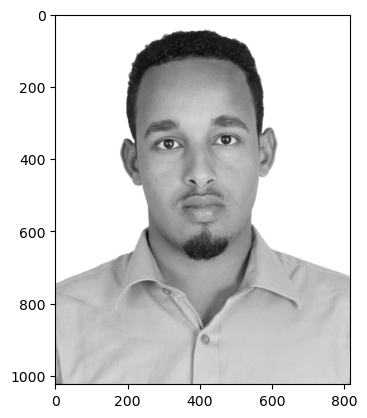

In [17]:
# Display the grayscale image
plt.imshow(gray, cmap='gray')

In [18]:
# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(r'C:/Users/HP/Downloads/friends_svm/model/opencv/haarcascade_frontalface_default.xml')

# Load the eye cascade classifier
eye_cascade = cv2.CascadeClassifier(r'C:/Users/HP/Downloads/friends_svm/model/opencv/haarcascade_eye.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# Perform face detection
faces

array([[167, 170, 462, 462]])

In [19]:
# Extract the coordinates and dimensions of the first detected face
(x,y,w,h) = faces[0]
x,y,w,h

(167, 170, 462, 462)

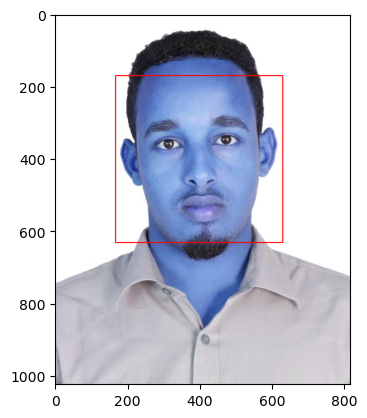

In [20]:
# Draw a rectangle around the detected face on the original image
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

# Display the image with the detected face
plt.imshow(face_img)

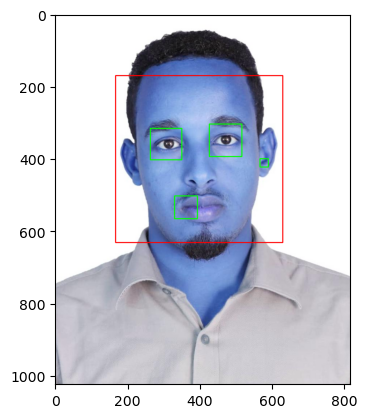

In [21]:
# Drawing rectangle around the detected faces and eyes 
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
# Display the final image with rectangles around the detected faces and eyes
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# (2) Preprocessing: Crop the facial region of the image

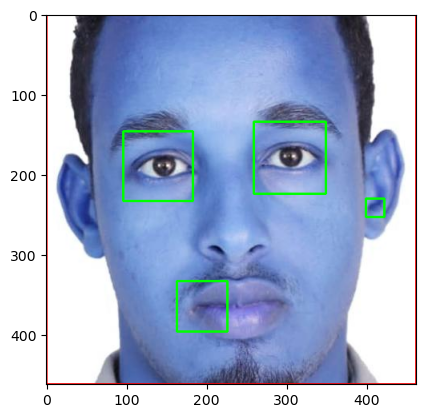

In [22]:
# dispaling the rectangle around only the detected eyes
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [23]:
# writing a function that takes an image path as input and returns a cropped image that contains both eyes if they are detected.
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

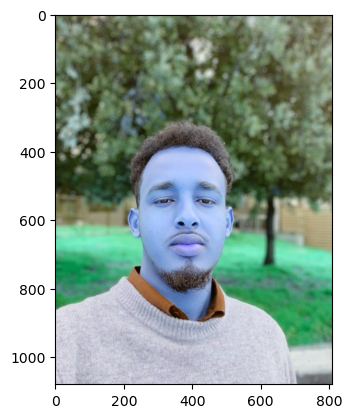

In [25]:
original_image = cv2.imread(r'C:/Users/HP/Downloads/friends_svm/model/test_images/hussein1.jpeg')
plt.imshow(original_image)

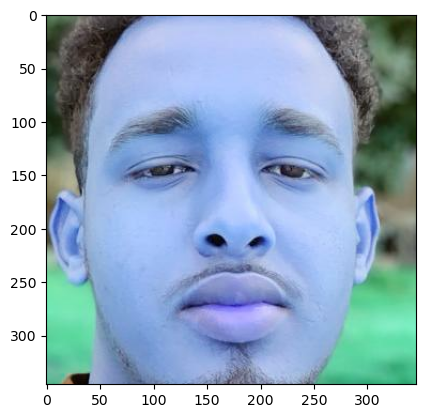

In [26]:
# Cropping the image to get the region containing both eyes
cropped_image = get_cropped_image_if_2_eyes(r'C:/Users/HP/Downloads/friends_svm/model/test_images/hussein1.jpeg')
# Displaying the cropped image
plt.imshow(cropped_image)

In [27]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'C:/Users/HP/Downloads/friends_svm/model/test_images/hussein1.jpeg')
cropped_image_no_2_eyes

array([[[ 88, 126,  90],
        [ 90, 128,  92],
        [ 92, 130,  94],
        ...,
        [ 61,  78,  41],
        [ 63,  81,  42],
        [ 65,  83,  44]],

       [[ 83, 124,  87],
        [ 87, 125,  89],
        [ 89, 127,  91],
        ...,
        [ 59,  76,  39],
        [ 60,  77,  40],
        [ 62,  80,  41]],

       [[ 81, 119,  83],
        [ 83, 121,  85],
        [ 86, 124,  88],
        ...,
        [ 59,  73,  37],
        [ 59,  73,  37],
        [ 61,  76,  38]],

       ...,

       [[ 91, 184, 147],
        [ 92, 182, 146],
        [ 94, 182, 146],
        ...,
        [ 64, 183, 132],
        [ 65, 184, 133],
        [ 66, 185, 134]],

       [[ 86, 182, 142],
        [ 87, 180, 141],
        [ 91, 180, 141],
        ...,
        [ 62, 180, 129],
        [ 62, 180, 129],
        [ 63, 181, 130]],

       [[ 80, 179, 139],
        [ 85, 178, 139],
        [ 87, 178, 139],
        ...,
        [ 59, 177, 126],
        [ 60, 178, 127],
        [ 61, 179, 128]]

In [28]:
import os

In [29]:
# Path to the main dataset directory
path_to_data = "C:/Users/HP/Downloads/friends_svm/model/dataset/"

# Path to the directory where cropped images will be saved
path_to_cr_data = "C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/"

In [30]:
# Create directories if they don't exist
os.makedirs(path_to_data, exist_ok=True)
os.makedirs(path_to_cr_data, exist_ok=True)

In [31]:
import os

# List to store the directories containing images
img_dirs = []

# Loop through the entries in the specified directory
for entry in os.scandir(path_to_data):
    # Check if the entry is a directory
    if entry.is_dir():
        # Append the path of the directory to the img_dirs list
        img_dirs.append(entry.path)

In [32]:
# displaying image directries
img_dirs

['C:/Users/HP/Downloads/friends_svm/model/dataset/Abdimajid_mohamed',
 'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped',
 'C:/Users/HP/Downloads/friends_svm/model/dataset/Daha_hussein',
 'C:/Users/HP/Downloads/friends_svm/model/dataset/Hussein_kidin',
 'C:/Users/HP/Downloads/friends_svm/model/dataset/Mahad_adan',
 'C:/Users/HP/Downloads/friends_svm/model/dataset/Mahdi_hussein']

In [33]:
cropped_image_dirs = []
friend_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    friend_name = img_dir.split('/')[-1]
    print(friend_name)

    friend_file_names_dict[friend_name] = []

    # Loop through the entries in the friend's directory
    for entry in os.scandir(img_dir):
        file_extension = os.path.splitext(entry.path)[-1].lower()
        if file_extension in ['.png', '.jpeg', '.jpg']:
            # Get cropped image if two eyes are detected
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + friend_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)

                cropped_file_name = friend_name + str(count) + file_extension
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)
                friend_file_names_dict[friend_name].append(cropped_file_path)
                count += 1

Abdimajid_mohamed
Generating cropped images in folder: C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed
cropped
Daha_hussein
Generating cropped images in folder: C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Daha_hussein
Hussein_kidin
Generating cropped images in folder: C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Hussein_kidin
Mahad_adan
Generating cropped images in folder: C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Mahad_adan
Mahdi_hussein
Generating cropped images in folder: C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Mahdi_hussein


In [34]:
friend_file_names_dict = {}

# Loop through the cropped image directories
for img_dir in cropped_image_dirs:
    friend_name = img_dir.split('/')[-1]
    file_list = []

    # Iterate through the entries in the cropped image directory
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)

    # Add the file list to the dictionary with the friend's name as the key
    friend_file_names_dict[friend_name] = file_list

# Print or perform further actions using friend_file_names_dict
friend_file_names_dict

{'Abdimajid_mohamed': ['C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed1.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed10.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed11.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed12.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed13.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed14.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed15.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed16.jpeg',
  'C:/Users/HP/Downloads/friends_svm/model/dataset/cropped/Abdimajid_mohamed\\Abdimajid_mohamed17.jpeg',
  'C:/Users/HP/Downloads/friends_sv

In [35]:
class_dict = {}
count = 0
for friend_name in friend_file_names_dict.keys():
    class_dict[friend_name] = count
    count = count + 1
class_dict

{'Abdimajid_mohamed': 0,
 'Daha_hussein': 1,
 'Hussein_kidin': 2,
 'Mahad_adan': 3,
 'Mahdi_hussein': 4}

In [36]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.


# (3) Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc# writing function that performs 
Wavelet transform

In [38]:
import numpy as np
import pywt
import cv2 
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [39]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [40]:
len(X[0])

4096

In [42]:
32*32*3 + 32*32

4096

In [43]:
X[0]

array([[231],
       [233],
       [234],
       ...,
       [198],
       [232],
       [  5]], dtype=uint8)

In [44]:
y[0]

0

In [45]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(84, 4096)

# Data cleaning process is done. Now we are ready to train our model
We will use SVM with rbf kernel tuned with heuristic finetuning

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6190476190476191

In [66]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.71      0.83      0.77         6
           2       0.60      0.75      0.67         4
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         4

    accuracy                           0.62        21
   macro avg       0.56      0.58      0.52        21
weighted avg       0.56      0.62      0.55        21



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [68]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [69]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.760256,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.506410,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.715385,{'logisticregression__C': 1}


In [70]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [71]:
best_estimators['svm'].score(X_test,y_test)

0.6666666666666666

In [72]:
best_estimators['random_forest'].score(X_test,y_test)

0.38095238095238093

In [73]:

best_estimators['logistic_regression'].score(X_test,y_test)

0.7142857142857143

In [74]:
best_clf = best_estimators['svm']

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 0, 0, 1],
       [0, 5, 0, 1, 0],
       [1, 0, 3, 0, 0],
       [0, 2, 1, 0, 0],
       [1, 0, 0, 0, 3]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

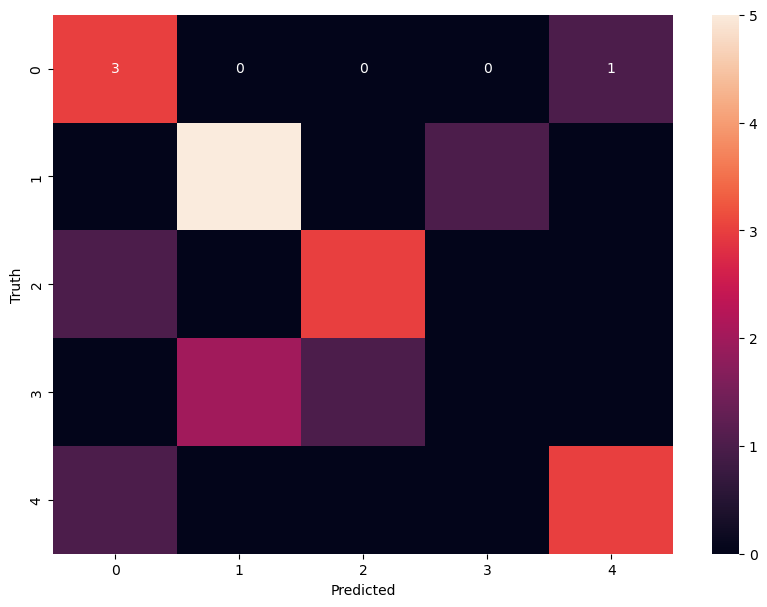

In [76]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
class_dict

{'Abdimajid_mohamed': 0,
 'Daha_hussein': 1,
 'Hussein_kidin': 2,
 'Mahad_adan': 3,
 'Mahdi_hussein': 4}

# Save the trained model

In [78]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary

In [79]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))